In [1]:
import pandas as pd

In [2]:
atta_df = pd.read_csv('./results/blstm_8sidor_comp_log.csv', index_col='epoch')
gp_df = pd.read_csv('./results/blstm_gp2013_comp_log.csv', index_col='epoch')

In [3]:
import matplotlib.pyplot as plt

plt.plot(atta_df.index, atta_df['loss'], label='8 Sidor Loss')
plt.plot(atta_df.index, atta_df['val_loss'], label='8 Sidor Val Loss')
plt.plot(gp_df.index, gp_df['loss'], label='GP2013 Loss')
plt.plot(gp_df.index, gp_df['val_loss'], label='GP2013 Val Loss')
plt.title('Comparing Loss from 8 Sidor and GP2013')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend()

plt.savefig('./results/compare_atta_gp_loss.png')
# plt.show()

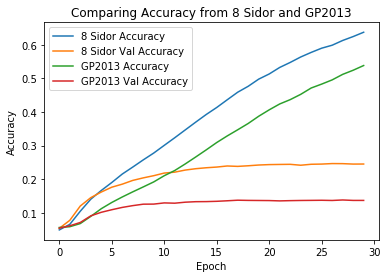

In [4]:
plt.plot(atta_df.index, atta_df['acc'], label='8 Sidor Accuracy')
plt.plot(atta_df.index, atta_df['val_acc'], label='8 Sidor Val Accuracy')
plt.plot(gp_df.index, gp_df['acc'], label='GP2013 Accuracy')
plt.plot(gp_df.index, gp_df['val_acc'], label='GP2013 Val Accuracy')
plt.title('Comparing Accuracy from 8 Sidor and GP2013')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('./results/compare_atta_gp_acc.png')

In [5]:
drop2 = pd.read_csv('./results/atta_blstm_log.csv', index_col='epoch')
# Keep the same number of epochs
drop2 = drop2[drop2.index < 25]
drop4 = pd.read_csv('./results/blstm_dropout4_log.csv', index_col='epoch')
drop6 = pd.read_csv('./results/blstm_dropout6_log.csv', index_col='epoch')
drop8 = pd.read_csv('./results/blstm_dropout8_log.csv', index_col='epoch')

In [6]:
res = []
res.append((0.2, drop2['val_loss'].min(), drop2['val_loss'].idxmin()))
res.append((0.4, drop4['val_loss'].min(), drop4['val_loss'].idxmin()))
res.append((0.6, drop6['val_loss'].min(), drop6['val_loss'].idxmin()))
res.append((0.8, drop8['val_loss'].min(), drop8['val_loss'].idxmin()))

print("Minimum validation loss: {:.3f} at epoch: {}".format(drop2['val_loss'].min(), drop2['val_loss'].idxmin()))
print("Minimum validation loss: {:.3f} at epoch: {}".format(drop4['val_loss'].min(), drop4['val_loss'].idxmin()))
print("Minimum validation loss: {:.3f} at epoch: {}".format(drop6['val_loss'].min(), drop6['val_loss'].idxmin()))
print("Minimum validation loss: {:.3f} at epoch: {}".format(drop8['val_loss'].min(), drop8['val_loss'].idxmin()))

res_df = pd.DataFrame(res, columns=['Dropout', 'Minimum Loss', 'Minimum Loss Epoch'])
res_df['Minimum Loss'] = res_df['Minimum Loss'].round(3)
print(res_df.to_latex(index=False))

Minimum validation loss: 3.374 at epoch: 7
Minimum validation loss: 3.342 at epoch: 23
Minimum validation loss: 3.451 at epoch: 23
Minimum validation loss: 3.824 at epoch: 24
\begin{tabular}{rrr}
\toprule
 Dropout &  Minimum Loss &  Minimum Loss Epoch \\
\midrule
     0.2 &         3.374 &                   7 \\
     0.4 &         3.342 &                  23 \\
     0.6 &         3.451 &                  23 \\
     0.8 &         3.824 &                  24 \\
\bottomrule
\end{tabular}



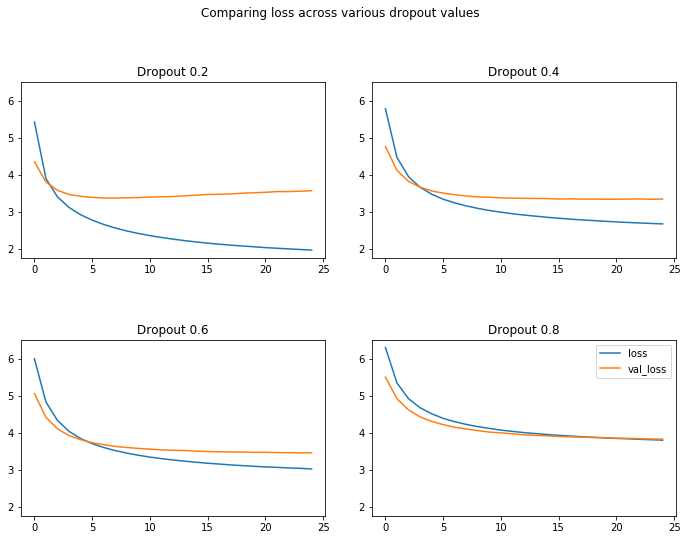

In [7]:
x = drop4.index
fig = plt.figure(1)
ax1 = plt.subplot(221)
plt.plot(x, drop2['loss'], label='Loss')
plt.plot(x, drop2['val_loss'], label='Validation Loss')
plt.title('Dropout 0.2')
plt.subplot(222, sharey=ax1)
plt.plot(x, drop4['loss'])
plt.plot(x, drop4['val_loss'])
plt.title('Dropout 0.4')
plt.subplot(223, sharey=ax1)
plt.plot(x, drop6['loss'])
plt.plot(x, drop6['val_loss'])
plt.title('Dropout 0.6')
plt.subplot(224, sharey=ax1)
plt.plot(x, drop8['loss'])
plt.plot(x, drop8['val_loss'])
plt.title('Dropout 0.8')
plt.legend()
#plt.plot(gp_df.index, gp_df['loss'], label='GP2013 Loss')
#plt.plot(gp_df.index, gp_df['val_loss'], label='GP2013 Val Loss')
fig.suptitle('Comparing loss across various dropout values')
fig.tight_layout()
fig.subplots_adjust(top = 0.85)
fig.set_size_inches(10,8)
plt.savefig('./results/dropout_compare_plot.png')